In [57]:
import torch
from torchvision import datasets, transforms
from itertools import islice
import matplotlib
import matplotlib.pyplot as plt

# Loading the MNIST data 
class Mnist:
    """
    Class that is used to read  adn transform the Mnist datasets from the web
    Args:
        batch_size: Preffered batch size
    """
    def __init__(self, batch_size):
        dataset_transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])
        
        test_data_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.ToPILImage(),
            transforms.RandomVerticalFlip(1.0),
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))

        ])

        train_dataset = datasets.MNIST('../data', train=True, download=True, transform=dataset_transform)
        test_dataset = datasets.MNIST('../data', train=False, download=True, transform=test_data_transform)
        
        self.train_loader  = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        self.test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)



    
        



In [58]:
batch_size = 1
mnist = Mnist(batch_size)

(28, 28)


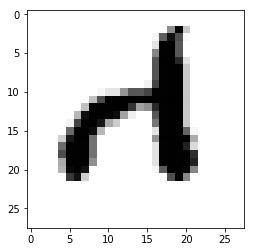

In [70]:

image =next(iter(mnist.test_loader))[0].squeeze().numpy()
print(image.shape)
imgplot = plt.imshow(image,cmap = matplotlib.cm.binary)